### Sistemas Recomendación Películas
## Sergio Esteban Tarrero

In [1]:
#!pip install ast, numpy, pandas, seaborn, matplotlib, sys, warnings
#!pip install -r requirements.txt

In [2]:
from itertools import islice
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import csv
import os
warnings.simplefilter('ignore')

# Importación del Dataset

### Dataset Películas

In [3]:
movies = pd.read_csv('tmdb_5000_movies.csv')

In [4]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [5]:
print(f"Columnas DF Películas: \n{list(movies.columns)} \n\nNº columnas DF Películas: {len(movies.columns)}")

Columnas DF Películas: 
['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count'] 

Nº columnas DF Películas: 20


In [6]:
print(f"Nº filas dataset movies: {movies.shape[0]}\nNº columnas dataset movies: {movies.shape[1]}")

Nº filas dataset movies: 4803
Nº columnas dataset movies: 20


### Dataset Créditos

In [7]:
credits = pd.read_csv('tmdb_5000_credits.csv')

In [8]:
credits.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [9]:
print(f"Columnas DF Créditos: \n{list(movies.columns)} \n\nNº columnas DF Créditos: {len(movies.columns)}")

Columnas DF Créditos: 
['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count'] 

Nº columnas DF Créditos: 20


In [10]:
print(f"Nº filas dataset creditos: {credits.shape[0]}\nNº columnas dataset creditos: {credits.shape[1]}")

Nº filas dataset creditos: 4803
Nº columnas dataset creditos: 4


**Resumen**

In [11]:
print(f"Nº filas dataset películas: {movies.shape[0]}\nNº columnas dataset películas: {movies.shape[1]}")
print(f"Nº filas dataset créditos: {credits.shape[0]}\nNº columnas dataset créditos: {credits.shape[1]}")

Nº filas dataset películas: 4803
Nº columnas dataset películas: 20
Nº filas dataset créditos: 4803
Nº columnas dataset créditos: 4


Se puede ver que el nº de filas de los dos dataframes coinciden, pero en el nº de 
las columnas hay una gran diferencia entre estas (20 y 4).

### Concatenación de los dataframes

In [12]:
movies = movies.merge(credits, on='title')

In [13]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [14]:
print(f"Con el merge aplicado:\nNº filas dataset movies: {movies.shape[0]}\nNº columnas dataset movies: {movies.shape[1]}")

Con el merge aplicado:
Nº filas dataset movies: 4809
Nº columnas dataset movies: 23


# Exploración de datos

In [15]:
def perform_eda(df, name=""):
    
    print(f"EDA Data:")
    print(f"Size {df.size}")
    print(f"Columns {df.shape[1]}")
    print(f"Records {df.shape[0]}")
    print("="*30)
    
    # Top 5 registros de datos
    #print("Primera búsqueda de datos ...")
    #display(df.head())
    #print("="*50)
    
    # Columnas numéricas y categóricas
    cat_cols = df.select_dtypes(np.object).columns
    num_cols = df.select_dtypes(np.number).columns

    # Columnas solo numéricas
    print("Columnas Numéricas:")
    for i, j in enumerate(num_cols):
        print(f" {i+1}) {j}")
        
    print("="*30)
    # Columnas categóricas
    print("Columnas Categóricas:")
    for i, j in enumerate(cat_cols):
        print(f" {i+1}) {j}")
            
    print("="*30)
    print("Propiedades estadísticas:")
    display(df.describe(include="all"))

In [16]:
perform_eda(movies)

EDA Data:
Size 110607
Columns 23
Records 4809
Columnas Numéricas:
 1) budget
 2) id
 3) popularity
 4) revenue
 5) runtime
 6) vote_average
 7) vote_count
 8) movie_id
Columnas Categóricas:
 1) genres
 2) homepage
 3) keywords
 4) original_language
 5) original_title
 6) overview
 7) production_companies
 8) production_countries
 9) release_date
 10) spoken_languages
 11) status
 12) tagline
 13) title
 14) cast
 15) crew
Propiedades estadísticas:


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
count,4.809000e+03,4809,1713,4809.000000,4809,4809,4809,4806,4809.000000,4809,...,4807.000000,4809,4809,3965,4809,4809.000000,4809.000000,4809.000000,4809,4809
unique,NaN,1175,1691,NaN,4222,37,4801,4800,NaN,3697,...,NaN,544,3,3944,4800,NaN,NaN,NaN,4761,4776
top,NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,NaN,[],en,Out of the Blue,Gang-du is a dim-witted man working at his fat...,NaN,[],...,NaN,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host,NaN,NaN,NaN,[],[]
freq,NaN,372,4,NaN,412,4510,4,2,NaN,352,...,NaN,3175,4801,3,4,NaN,NaN,NaN,43,28
mean,2.902780e+07,NaN,NaN,57120.571429,NaN,NaN,NaN,NaN,21.491664,NaN,...,106.882255,NaN,NaN,NaN,NaN,6.092514,690.331670,57120.571429,NaN,NaN
std,4.070473e+07,NaN,NaN,88653.369849,NaN,NaN,NaN,NaN,31.803366,NaN,...,22.602535,NaN,NaN,NaN,NaN,1.193989,1234.187111,88653.369849,NaN,NaN
min,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,...,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,5.000000,NaN,NaN
25%,7.800000e+05,NaN,NaN,9012.000000,NaN,NaN,NaN,NaN,4.667230,NaN,...,94.000000,NaN,NaN,NaN,NaN,5.600000,54.000000,9012.000000,NaN,NaN
50%,1.500000e+07,NaN,NaN,14624.000000,NaN,NaN,NaN,NaN,12.921594,NaN,...,103.000000,NaN,NaN,NaN,NaN,6.200000,235.000000,14624.000000,NaN,NaN
75%,4.000000e+07,NaN,NaN,58595.000000,NaN,NaN,NaN,NaN,28.350529,NaN,...,118.000000,NaN,NaN,NaN,NaN,6.800000,737.000000,58595.000000,NaN,NaN


## Bar Plot

Aquí voy a investigar principalmente de qué lenguaje original salen las películas del dataset.

In [17]:
def per_on_bar(feature, title="", limited=False, n=10):

    print("Lenguajes únicos: ", len(feature.value_counts()), "\n\n")
    print("Categoría\tValor\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    
    # Creación del gráfico
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.title("Lenguajes de las películas y su % con el total (primeras 10)", fontsize=16)
    plt.xticks(rotation=45)
    plt.xlabel("Lenguajes", fontsize=16)
    plt.ylabel("Nº películas", fontsize=12) 
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="black", palette=sns.palettes.color_palette("icefire"))
    
    total = len(feature)
    
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 14)
        
    print("Lenguajes únicos: ", len(feature.value_counts()), "\n\n")
    plt.show()

Lenguajes únicos:  37 


Categoría	Valor

en    4510
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
ko      12
cn      12
Name: original_language, dtype: int64
Lenguajes únicos:  37 




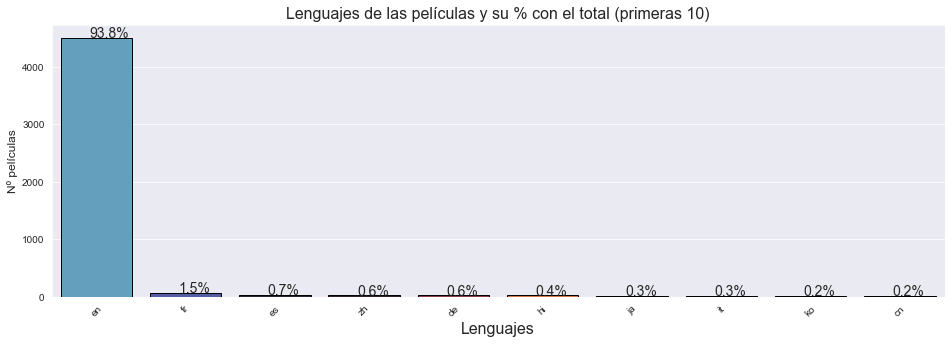

In [18]:
per_on_bar(movies.original_language, limited = True, n = 10)

Como se puede ver en la lista hay un total de **37 idiomas** distintos en el dataset.

Del gráfico vemos que un **~94%** de las películas del dataset son en **inglés**, 

seguidas del segundo (**1,5%**) que son francesas y la tercera (**0,7%**) españolas.

# Preparación de los datos

Filtrado de columnas

In [19]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]
print(list(movies.columns))

['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew']


In [20]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [21]:
print(f"Nº Filas: {movies.shape[0]}\nNº Columnas: {movies.shape[1]}")

Nº Filas: 4809
Nº Columnas: 7


In [22]:
def convert(text):
    return list(map(lambda x: x['name'], ast.literal_eval(text)))

Limpieza y sobreescritura

In [23]:
movies.dropna(inplace = True)

In [24]:
# Limpieza para el género de la película
movies['genres'] = movies['genres'].apply(convert)
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [25]:
# Limpieza para las palabras clave
movies['keywords'] = movies['keywords'].apply(convert)
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [26]:
def convert3(text):
    return [i['name'] for i in islice(ast.literal_eval(text), 3)]

In [27]:
# Limpieza para actores
movies['cast'] = movies['cast'].apply(convert)
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [28]:
def fetch_director(text):
    return list(map(lambda x: x['name'], filter(lambda x: x['job'] == 'Director', ast.literal_eval(text))))

In [29]:
# Limpieza para productor
movies['crew'] = movies['crew'].apply(fetch_director)
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]


In [30]:
movies['cast'] = movies['cast'].apply(lambda x:x[0:3])
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]


In [31]:
def collapse(L):
    return list(map(lambda x: x.replace(" ",""), L))

In [32]:
# Limpieza de espacios en blanco
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [33]:
# Separación de palabras en la descripción de la película, columna "overview"
movies['overview'] = movies['overview'].apply(lambda x:x.split())
#movies.head()
movies.loc[:, 'overview']

0       [In, the, 22nd, century,, a, paraplegic, Marin...
1       [Captain, Barbossa,, long, believed, to, be, d...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, war-weary,, former, mili...
                              ...                        
4804    [El, Mariachi, just, wants, to, play, his, gui...
4805    [A, newlywed, couple's, honeymoon, is, upended...
4806    ["Signed,, Sealed,, Delivered", introduces, a,...
4807    [When, ambitious, New, York, attorney, Sam, is...
4808    [Ever, since, the, second, grade, when, he, fi...
Name: overview, Length: 4806, dtype: object

Esta es una de las claves principales, sacar en forma de lista y palabra por palabra

todo el contenido de la fila, esto ayuda bastante para el filtrado final.

In [34]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [35]:
movies['tags'].head(3)

0    [In, the, 22nd, century,, a, paraplegic, Marin...
1    [Captain, Barbossa,, long, believed, to, be, d...
2    [A, cryptic, message, from, Bond’s, past, send...
Name: tags, dtype: object

Borrar columnas que no se necesitan ya

In [36]:
new = movies.drop(columns=['overview','genres','keywords','cast','crew'])
new.shape

(4806, 3)

In [37]:
new['tags'] = new['tags'].apply(lambda x: " ".join(x))
new.head(5)

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [38]:
# Extracción de características
from sklearn.feature_extraction.text import CountVectorizer

# Conviertir los datos de las palabras de la columna "tags" en array de vectores
cv = CountVectorizer(max_features=5000,stop_words='english')
vector = cv.fit_transform(new['tags']).toarray()

Matriz formada por arrays de números, que pueden varian entre 0, 1, 2, 3 ...

In [39]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
vector.shape

(4806, 5000)

# Construcción del Sistema de Recomendación

In [41]:
from sklearn.metrics.pairwise import cosine_similarity

In [42]:
# Función de similitud
cosine_similarity(vector).shape

(4806, 4806)

In [43]:
similarity = cosine_similarity(vector)

In [44]:
print(f"Matriz de similitud: \n\n{similarity}")

Matriz de similitud: 

[[1.         0.08964215 0.06071767 ... 0.02519763 0.0277885  0.        ]
 [0.08964215 1.         0.06350006 ... 0.02635231 0.         0.        ]
 [0.06071767 0.06350006 1.         ... 0.02677398 0.         0.        ]
 ...
 [0.02519763 0.02635231 0.02677398 ... 1.         0.07352146 0.04774099]
 [0.0277885  0.         0.         ... 0.07352146 1.         0.05264981]
 [0.         0.         0.         ... 0.04774099 0.05264981 1.        ]]


In [45]:
type(similarity)

numpy.ndarray

In [46]:
similarity[:15, 2:5]

array([[0.06071767, 0.03984095, 0.18257419],
       [0.06350006, 0.02083333, 0.08183171],
       [1.        , 0.04233338, 0.0831411 ],
       [0.04233338, 1.        , 0.03636965],
       [0.0831411 , 0.03636965, 1.        ],
       [0.07544932, 0.04950738, 0.06482037],
       [0.02467069, 0.04856429, 0.06358559],
       [0.16064387, 0.07027284, 0.18401748],
       [0.06788442, 0.02227177, 0.02916059],
       [0.0547791 , 0.23363768, 0.09412416],
       [0.09379581, 0.06154575, 0.13430383],
       [0.37387825, 0.05661385, 0.04941662],
       [0.06788442, 0.02227177, 0.11664237],
       [0.05029955, 0.01650246, 0.06482037],
       [0.06071767, 0.05976143, 0.10432811]])

La **matriz de similitud** es una matriz que se utiliza para medir la similitud entre elementos de un conjunto de datos.

La **diagonal principal** representa la similitud de un elemento consigo mismo, es decir, siempre es 1. 

In [47]:
df_similarity = pd.DataFrame(similarity)

In [48]:
df_similarity

,0,1,2,3,4,5,6,7,8,9,...,4796,4797,4798,4799,4800,4801,4802,4803,4804,4805
0,1.000000,0.089642,0.060718,0.039841,0.182574,0.118345,0.023218,0.176383,0.063888,0.077331,...,0.000000,0.000000,0.021296,0.058849,0.000000,0.024922,0.053452,0.025198,0.027789,0.000000
1,0.089642,1.000000,0.063500,0.020833,0.081832,0.123768,0.024282,0.131762,0.066815,0.080875,...,0.000000,0.000000,0.022272,0.000000,0.000000,0.026064,0.000000,0.026352,0.000000,0.000000
2,0.060718,0.063500,1.000000,0.042333,0.083141,0.075449,0.024671,0.160644,0.067884,0.054779,...,0.048002,0.000000,0.000000,0.000000,0.021467,0.052963,0.000000,0.026774,0.000000,0.000000
3,0.039841,0.020833,0.042333,1.000000,0.036370,0.049507,0.048564,0.070273,0.022272,0.233638,...,0.031497,0.028583,0.014848,0.041030,0.028172,0.052129,0.000000,0.052705,0.058124,0.056614
4,0.182574,0.081832,0.083141,0.036370,1.000000,0.064820,0.063586,0.184017,0.029161,0.094124,...,0.041239,0.000000,0.000000,0.026861,0.000000,0.022751,0.000000,0.023002,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,0.024922,0.026064,0.052963,0.052129,0.022751,0.020646,0.040505,0.065938,0.055728,0.022485,...,0.000000,0.071520,0.000000,0.025666,0.035245,1.000000,0.000000,0.000000,0.024239,0.000000
4802,0.053452,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.076696,0.000000,0.000000,0.000000,0.000000,1.000000,0.094281,0.051988,0.000000
4803,0.025198,0.026352,0.026774,0.052705,0.023002,0.020874,0.000000,0.000000,0.056344,0.045466,...,0.079682,0.036155,0.056344,0.051900,0.000000,0.000000,0.094281,1.000000,0.073521,0.047741
4804,0.027789,0.000000,0.000000,0.058124,0.000000,0.023020,0.022582,0.000000,0.062137,0.025071,...,0.000000,0.039873,0.000000,0.000000,0.000000,0.024239,0.051988,0.073521,1.000000,0.052650


Ahora una vez se tiene todo lo necesario para poder hacer una recomendación,

procedo a hacer una función para que recomiende una película con una **distancia determinada**.

Una **distancia de recomendación** es la muestra de los valores más parecidos al valor incial.

Es decir, si introduzco el título de una película mostrará las 5 películas que más recomendación tienen según el modelo generado.

In [49]:
def recommend(movie):
    index = new[new['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new.iloc[i[0]].title)

### Testeo

In [50]:
# Película: EL hombre de acero
recommend('Man of Steel')

Superman Returns
Superman II
Ong Bak 2
X-Men: First Class
Superman IV: The Quest for Peace


In [51]:
# Película: Mad Max: Furia en la carretera
recommend('Mad Max: Fury Road')

Kites
The Book of Eli
Mad Max
Equilibrium
Children of Men


In [52]:
# Película: Avatar
recommend('Avatar')

Titan A.E.
Small Soldiers
Ender's Game
Aliens vs Predator: Requiem
Independence Day


In [53]:
# Película: Piratas del Caribe: En el fin del mundo
recommend("Pirates of the Caribbean: At World's End")

Pirates of the Caribbean: Dead Man's Chest
Pirates of the Caribbean: The Curse of the Black Pearl
Pirates of the Caribbean: On Stranger Tides
20,000 Leagues Under the Sea
Puss in Boots


In [54]:
# Película: Titanic
recommend('Titanic')

Captain Phillips
The Notebook
In the Heart of the Sea
Ghost Ship
Poseidon


## Todas las películas con las que se puede testear

In [55]:
movies['title'].values.tolist()

['Avatar',
 "Pirates of the Caribbean: At World's End",
 'Spectre',
 'The Dark Knight Rises',
 'John Carter',
 'Spider-Man 3',
 'Tangled',
 'Avengers: Age of Ultron',
 'Harry Potter and the Half-Blood Prince',
 'Batman v Superman: Dawn of Justice',
 'Superman Returns',
 'Quantum of Solace',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lone Ranger',
 'Man of Steel',
 'The Chronicles of Narnia: Prince Caspian',
 'The Avengers',
 'Pirates of the Caribbean: On Stranger Tides',
 'Men in Black 3',
 'The Hobbit: The Battle of the Five Armies',
 'The Amazing Spider-Man',
 'Robin Hood',
 'The Hobbit: The Desolation of Smaug',
 'The Golden Compass',
 'King Kong',
 'Titanic',
 'Captain America: Civil War',
 'Battleship',
 'Jurassic World',
 'Skyfall',
 'Spider-Man 2',
 'Iron Man 3',
 'Alice in Wonderland',
 'X-Men: The Last Stand',
 'Monsters University',
 'Transformers: Revenge of the Fallen',
 'Transformers: Age of Extinction',
 'Oz: The Great and Powerful',
 'The Amazing Spider-Man 2',

Redondear valores de la matriz de similitud

In [56]:
df_similarity_rounded = df_similarity.applymap(lambda x: round(x, 3) if isinstance(x, (int, float)) else x)

In [58]:
# Exportación
if not (os.path.isfile('df_similarity_rounded.csv')):
    df_similarity.to_csv('df_similarity_rounded.csv', index=False)
else:
    print('Archivo df_similarity_rounded.csv ya existe')

Archivo df_similarity_rounded.csv ya existe
